In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading Dataset
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Data Cleaning**

In [6]:
#fill the nan value using interpolate method it will work on numeric data only.
df.interpolate(inplace=True)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have worked on removing the NAN value inside Cbin column and Embarked coulumn we are using Simple imputer .

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant')
df['Embarked']=imputer.fit_transform(df[['Embarked']])

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
df.drop(['Cabin'],axis=1,inplace=True)

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Engineering**

In [12]:
# Create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Age' column
imputer.fit(df[['Fare']])

# Transform and replace the null values in the 'Age' column with the median
df['Fare'] = imputer.transform(df[['Fare']])

In [13]:
#creating new columns by combining sibling/spouse column  and parent /children column.
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [14]:
label = LabelEncoder()
label.fit(df['Sex'].drop_duplicates())
df['Sex'] = label.transform(df['Sex'])

In [15]:
label.fit(df['Embarked'].drop_duplicates())
df['Embarked']=label.transform(df['Embarked'])

In [16]:
df['Pclass_Fare_interaction'] = df['Pclass'] * df['Fare']

In [17]:
label.fit(df['Ticket'].drop_duplicates())
df['Ticket']=label.transform(df['Ticket'])

**Data Visualization**

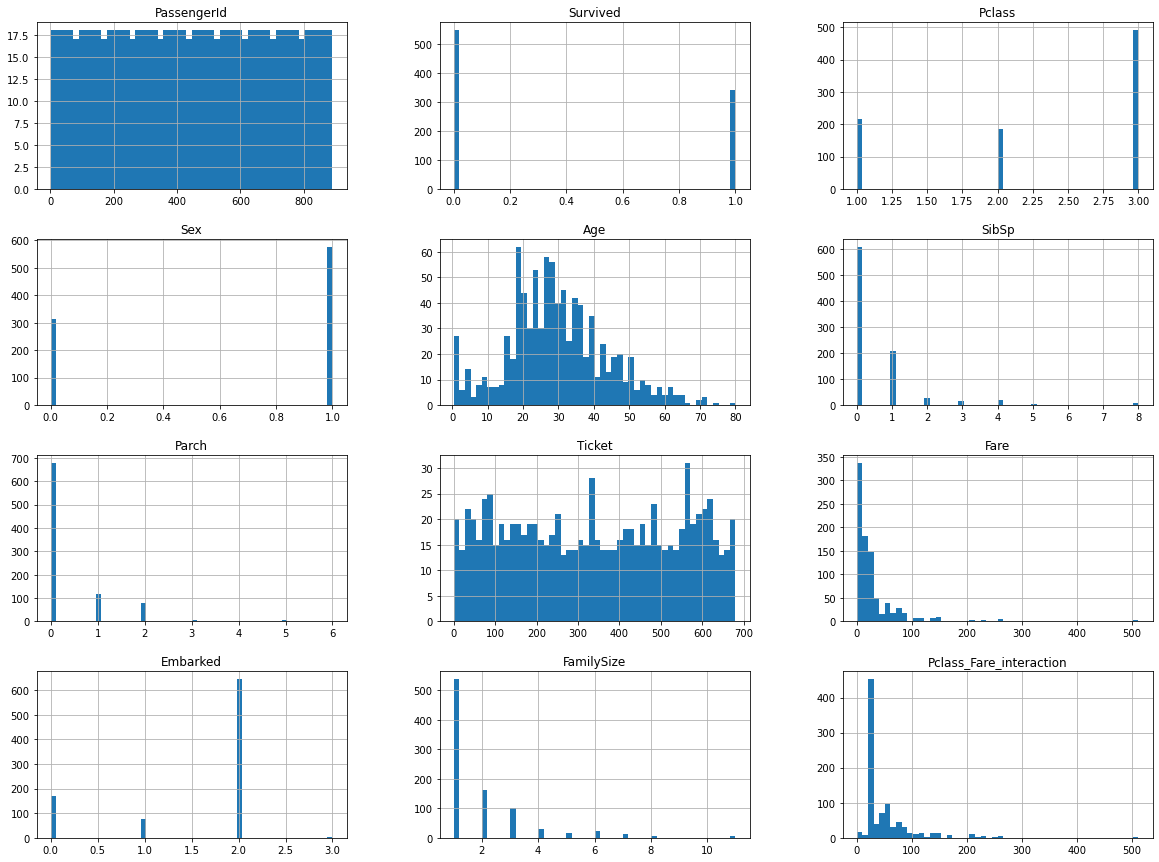

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

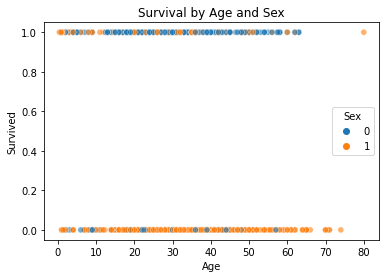

In [19]:
import seaborn as sns

sns.scatterplot(x='Age', y='Survived', hue='Sex', data=df, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Survival by Age and Sex')
plt.show()


0.0 is not survived and 1.0 represent survived we can see that male passenger are more likely to died on the titanic crash ,we can see that Female passengers are likely to survived with fewer male passengers.

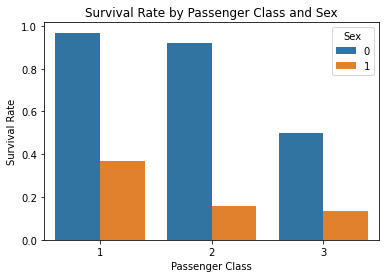

In [20]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Sex')
plt.legend(title='Sex', loc='upper right')
plt.show()

class1 passengers male$female is survived rate is much higher than of class 2 passengers and class 3.

In [21]:
df['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

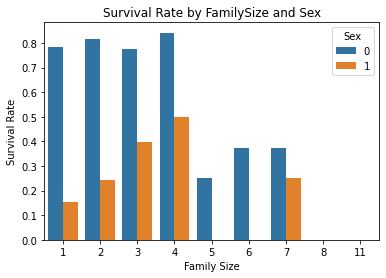

In [22]:
sns.barplot(x='FamilySize', y='Survived', hue='Sex', data=df, ci=None)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by FamilySize and Sex')
plt.legend(title='Sex', loc='upper right')
plt.show()

Family size of 4 and 3 have highest survival rate of male and female followed by 2 and 1,where as 5 and 6 family size we can see no survival of male and 8 and 11 family size have no survival both male and female. 
* Conclusion: Female Passengers have given more priority than male passengers.

In [23]:
df.drop(['PassengerId'],axis=1,inplace=True)

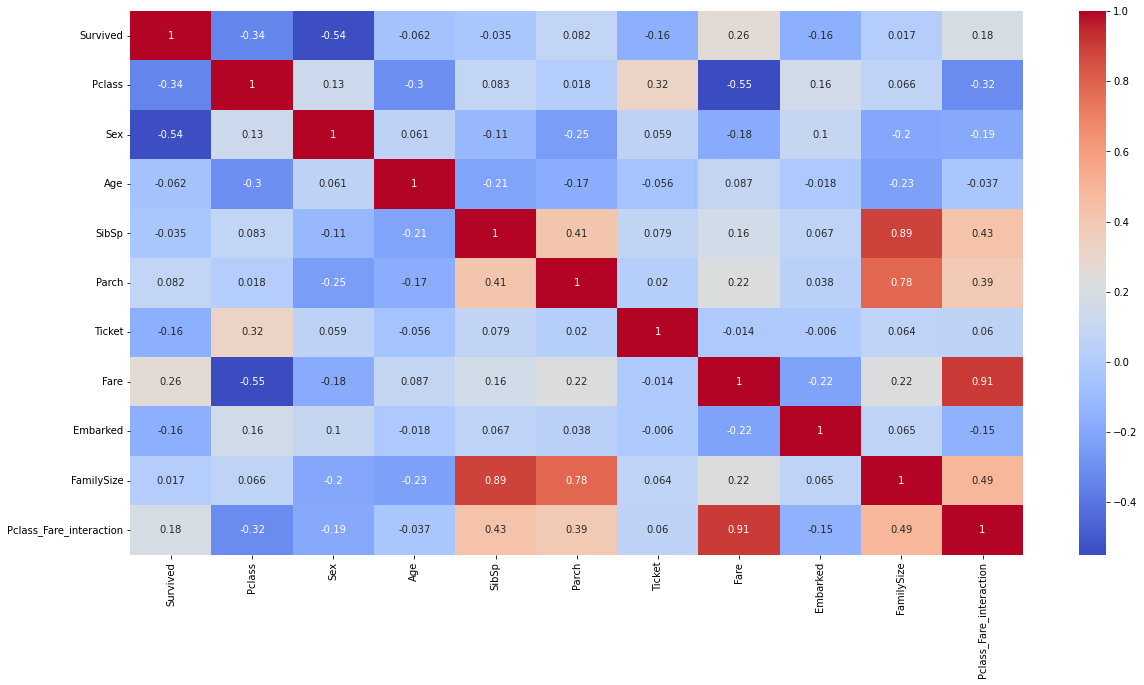

In [24]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [25]:
# Splitting dataframe df into X an y.
X=df.drop(['Name','Survived'],axis=1)
y=df['Survived']

In [26]:
# Train test and split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# imporing logistic regression.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logreg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
# Evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7877094972067039
Precision: 0.7727272727272727
Recall: 0.6891891891891891
F1-Score: 0.7285714285714284


In [31]:
# Random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8324022346368715


**Hyperparameter Tuning**

In [32]:
# Tuning Model with GridsearchCV
logreg_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [33]:
# Performing Grid Search with cross-validation
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5)
logreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [34]:
# Get the best hyperparameters and score
logreg_best_params = logreg_grid_search.best_params_
logreg_best_score = logreg_grid_search.best_score_

In [35]:
# Train the Logistic Regression model with the best hyperparameters
logreg_best = LogisticRegression(**logreg_best_params)
logreg_best.fit(X_train, y_train)

LogisticRegression(C=1)

In [36]:
# Make predictions on the test set
logreg_pred = logreg_best.predict(X_test)

In [37]:
# Calculating the accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7877094972067039


In [38]:
# Random Forest Classifier
rf = RandomForestClassifier()

# Defining the hyperparameters for tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [39]:
# Performing Grid Search with cross-validation
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [40]:
# Getting the best hyperparameters and score
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

In [41]:
# Training the Random Forest Classifier with the best hyperparameters
rf_best = RandomForestClassifier(**rf_best_params)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [42]:
rf_pred = rf_best.predict(X_test)

In [43]:
# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8156424581005587


In [44]:
# Calculating metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)

print("Logistic Regression Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-Score:", logreg_f1)
print()

Logistic Regression Metrics:
Accuracy: 0.7877094972067039
Precision: 0.7727272727272727
Recall: 0.6891891891891891
F1-Score: 0.7285714285714284



In [45]:
# Calculating metrics for Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)

Random Forest Metrics:
Accuracy: 0.8156424581005587
Precision: 0.8253968253968254
Recall: 0.7027027027027027
F1-Score: 0.7591240875912408


In [55]:
#Importing Pickle
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_best, file)
    
print('Model Completed ')

Model Completed 
